In [ ]:
### If save data:
save_data = False

if save_data:
  def ensure_dir(file_path):
    import os
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

  from google.colab import drive
  drive.mount('/content/drive')
  %cd drive/My Drive/
  save_dir = "Figs/"
  ensure_dir(save_dir)

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlretrieve
import os
from os.path import join
!pip install -q git+https://github.com/Pehlevan-Group/kernel-generalization
from kernel_generalization import kernel_simulation as ker_sim

source_dir = "https://raw.github.com/Pehlevan-Group/kernel-generalization/main/PrecomputedData/RealDataGaussianRBF/"

mnist_theory_name = 'Gauss_theory_MNIST_ManyParameters.npz'
mnist_exp_name = 'Gauss_experiment_MNIST_ManyParameters.npz'
cifar_theory_name = 'Gauss_theory_CIFAR10_ManyParameters.npz'
cifar_exp_name = 'Gauss_experiment_CIFAR10_ManyParameters.npz'
mnist_theory_BV_name = 'MNIST_Gauss_theory_BV.npz'
mnist_exp_BV_name = 'MNIST_Gauss_exp_BV.npz'
cifar_theory_BV_name = 'CIFAR_Gauss_theory_BV.npz'
cifar_exp_BV_name = 'CIFAR_Gauss_exp_BV.npz'

dir_mnist_theory_many = join(os.getcwd(), mnist_theory_name)
dir_mnist_exp_many = join(os.getcwd(), mnist_exp_name)
dir_cifar_theory_many = join(os.getcwd(), cifar_theory_name)
dir_cifar_exp_many = join(os.getcwd(), cifar_exp_name)
dir_mnist_theory_BV = join(os.getcwd(), mnist_theory_BV_name)
dir_mnist_exp_BV = join(os.getcwd(), mnist_exp_BV_name)
dir_cifar_theory_BV = join(os.getcwd(), cifar_theory_BV_name)
dir_cifar_exp_BV = join(os.getcwd(), cifar_exp_BV_name)

urlretrieve(join(source_dir, mnist_theory_name), dir_mnist_theory_many)
urlretrieve(join(source_dir, mnist_exp_name), dir_mnist_exp_many)
urlretrieve(join(source_dir, cifar_theory_name), dir_cifar_theory_many)
urlretrieve(join(source_dir, cifar_exp_name), dir_cifar_exp_many)
urlretrieve(join(source_dir, mnist_theory_BV_name), dir_mnist_theory_BV)
urlretrieve(join(source_dir, mnist_exp_BV_name), dir_mnist_exp_BV)
urlretrieve(join(source_dir, cifar_theory_BV_name), dir_cifar_theory_BV)
urlretrieve(join(source_dir, cifar_exp_BV_name), dir_cifar_exp_BV)

('/content/drive/My Drive/CIFAR_Gauss_exp_BV.npz',
 <http.client.HTTPMessage at 0x7fcffe23fe48>)

# MNIST RBF Examples

{'dataset_name': 'MNIST', 'test_size': 10000, 'subset_size': 12000, 'batch_size': 100, 'num_repeats': 30, 'noise_std': array([0.        , 0.5       , 0.70710677, 1.        , 1.2247449 ,
       1.4142135 , 1.5811388 ], dtype=float32), 'ker_var': [0.08, 0.1, 0.5], 'lamb': [0.01, 0.1]}


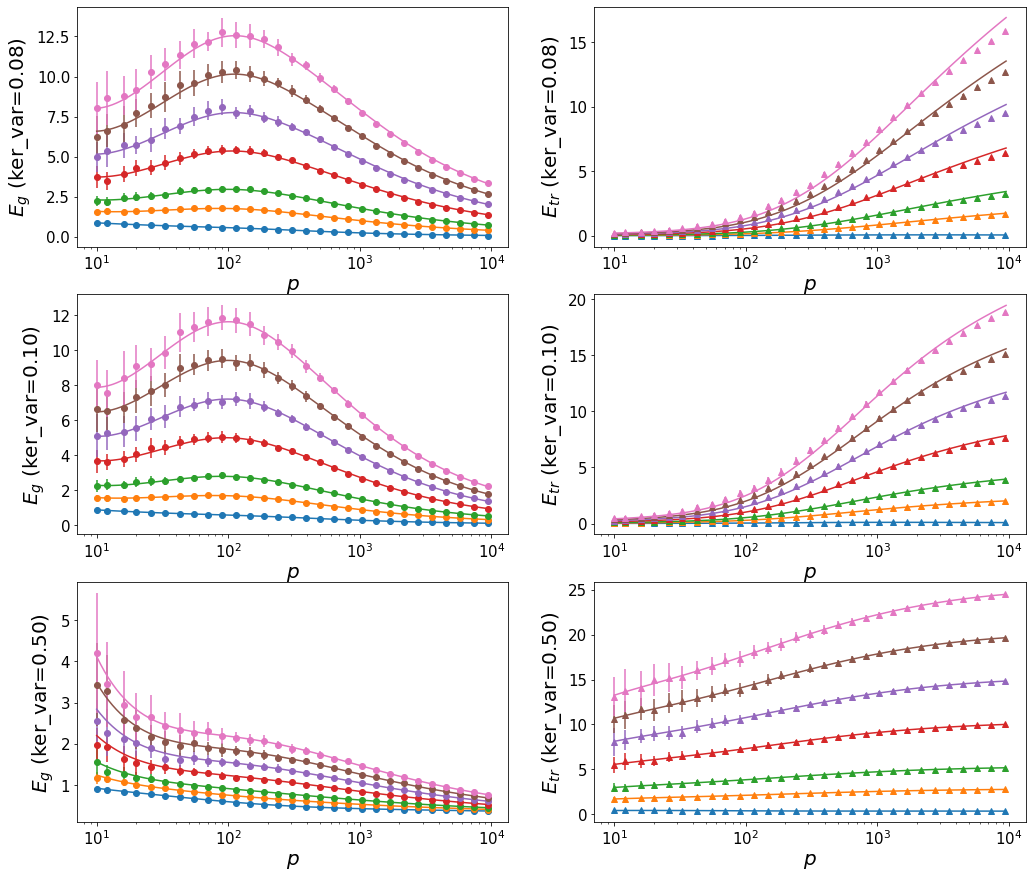

In [ ]:
error_theory_mnist = np.load(dir_mnist_theory_many, allow_pickle = True)
error_exp_ker_mnist = np.load(dir_mnist_exp_many)

[ptheory_mnist, spectrum_mnist, 
 weights_mnist, all_errs_mnist, 
 train_errs_mnist, params_mnist] = [error_theory_mnist['arr_'+str(i)] for i in range(len(error_theory_mnist.files))]
 
[pvals_mnist, errs_ker_mnist, stds_ker_mnist, 
 errs_tr_ker_mnist, stds_tr_ker_mnist] = [error_exp_ker_mnist['arr_'+str(i)] for i in range(len(error_exp_ker_mnist.files))]

params_mnist = params_mnist.tolist()
print(params_mnist)

ker_var_mnist = params_mnist['ker_var']
lamb_mnist = params_mnist['lamb']
noise_std_mnist = params_mnist['noise_std']**2
num_repeats_mnist = params_mnist['num_repeats']

## Plotting the curves
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(len(ker_var_mnist), 2)
fig.set_size_inches(17,5*len(ker_var_mnist))

## Specify the regularization index for plotting
j = reg_idx = 0
for i, var in enumerate(ker_var_mnist):
  for k, noise in enumerate(noise_std_mnist):
    theory = all_errs_mnist[i,j,k]
    train_theory = train_errs_mnist[i,j,k]
    exp = errs_ker_mnist[i,j,k][:-1]
    std = stds_ker_mnist[i,j,k][:-1]

    exp_tr = errs_tr_ker_mnist[i,j,k][:-1]
    std_tr = stds_tr_ker_mnist[i,j,k][:-1]

    axs[i,0].plot(ptheory_mnist, theory, color = 'C%d' % (k))
    axs[i,0].errorbar(pvals_mnist[:-1], exp, std, fmt='o', color = 'C%d' % (k), label = '$\sigma^2 = $ %0.1f' %(noise))
    axs[i,0].set_xlabel(r'$p$', fontsize=20)
    axs[i,0].set_ylabel(r'$E_g$ (ker_var=%0.2f)' %var, fontsize=20)
    axs[i,0].set_xscale('log')
    #axs[i,0].set_yscale('log')

    axs[i,1].plot(ptheory_mnist, train_theory, color = 'C%d' % (k))
    axs[i,1].errorbar(pvals_mnist[:-1], exp_tr, std_tr, fmt='^', color = 'C%d' % (k))
    axs[i,1].set_xlabel(r'$p$', fontsize=20)
    axs[i,1].set_ylabel(r'$E_{tr}$ (ker_var=%0.2f)' %var, fontsize=20)
    axs[i,1].set_xscale('log')

plt.show()

# CIFAR10 RBF Examples

{'dataset_name': 'CIFAR10', 'test_size': 10000, 'subset_size': 12000, 'batch_size': 100, 'num_repeats': 30, 'noise_std': array([0.        , 0.5       , 0.70710677, 1.        , 1.2247449 ,
       1.4142135 , 1.5811388 ], dtype=float32), 'ker_var': [0.08, 0.1, 0.5], 'lamb': [0.01, 0.1]}


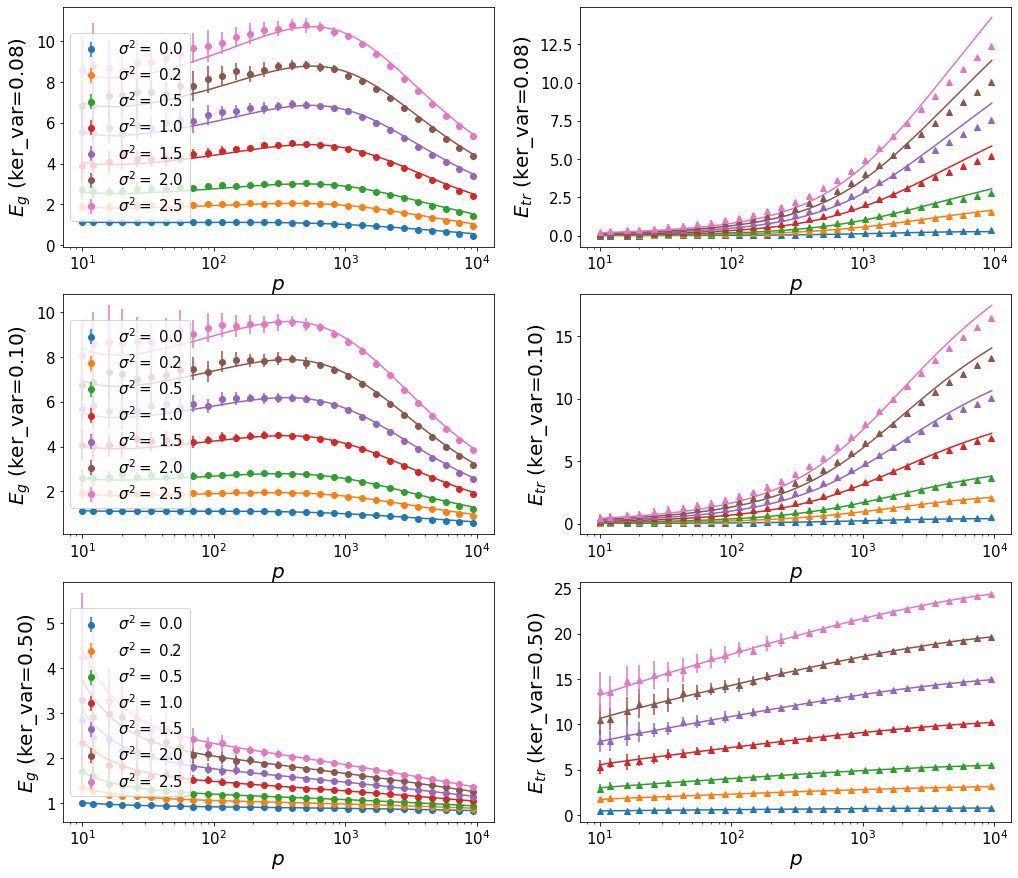

In [ ]:
error_theory_cifar = np.load(dir_cifar_theory_many, allow_pickle = True)
error_exp_ker_cifar = np.load(dir_cifar_exp_many)

[ptheory_cifar, spectrum_cifar, 
 weights_cifar, all_errs_cifar, 
 train_errs_cifar, params_cifar] = [error_theory_cifar['arr_'+str(i)] for i in range(len(error_theory_cifar.files))]

[pvals_cifar, errs_ker_cifar, stds_ker_cifar, 
 errs_tr_ker_cifar, stds_tr_ker_cifar] = [error_exp_ker_cifar['arr_'+str(i)] for i in range(len(error_exp_ker_cifar.files))]
 
params_cifar = params_cifar.tolist()
print(params_cifar)

ker_var_cifar = params_cifar['ker_var']
lamb_cifar = params_cifar['lamb']
noise_std_cifar = params_cifar['noise_std']**2
num_repeats_cifar = params_cifar['num_repeats']

## Plotting the curves
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(len(ker_var_cifar), 2)
fig.set_size_inches(17,5*len(ker_var_cifar))

## Specify the regularization index for plotting
j = reg_idx = 0
for i, var in enumerate(ker_var_cifar):
  for k, noise in enumerate(noise_std_cifar):
    theory = all_errs_cifar[i,j,k]
    train_theory = train_errs_cifar[i,j,k]
    exp = errs_ker_cifar[i,j,k][:-1]
    std = stds_ker_cifar[i,j,k][:-1]

    exp_tr = errs_tr_ker_cifar[i,j,k][:-1]
    std_tr = stds_tr_ker_cifar[i,j,k][:-1]

    axs[i,0].plot(ptheory_cifar, theory, color = 'C%d' % (k))
    axs[i,0].errorbar(pvals_cifar[:-1], exp, std, fmt='o', color = 'C%d' % (k), label = '$\sigma^2 = $ %0.1f' %(noise))
    axs[i,0].set_xlabel(r'$p$', fontsize=20)
    axs[i,0].set_ylabel(r'$E_g$ (ker_var=%0.2f)' %var, fontsize=20)
    axs[i,0].set_xscale('log')
    #axs[i,0].set_yscale('log')
    axs[i,0].legend(loc = 'center left')

    axs[i,1].plot(ptheory_cifar, train_theory, color = 'C%d' % (k))
    axs[i,1].errorbar(pvals_cifar[:-1], exp_tr, std_tr, fmt='^', color = 'C%d' % (k))
    axs[i,1].set_xlabel(r'$p$', fontsize=20)
    axs[i,1].set_ylabel(r'$E_{tr}$ (ker_var=%0.2f)' %var, fontsize=20)
    axs[i,1].set_xscale('log')

plt.show()

In [ ]:
params_cifar, params_mnist

({'batch_size': 100,
  'dataset_name': 'CIFAR10',
  'ker_var': [0.08, 0.1, 0.5],
  'lamb': [0.01, 0.1],
  'noise_std': array([0.        , 0.5       , 0.70710677, 1.        , 1.2247449 ,
         1.4142135 , 1.5811388 ], dtype=float32),
  'num_repeats': 30,
  'subset_size': 12000,
  'test_size': 10000},
 {'batch_size': 100,
  'dataset_name': 'MNIST',
  'ker_var': [0.08, 0.1, 0.5],
  'lamb': [0.01, 0.1],
  'noise_std': array([0.        , 0.5       , 0.70710677, 1.        , 1.2247449 ,
         1.4142135 , 1.5811388 ], dtype=float32),
  'num_repeats': 30,
  'subset_size': 12000,
  'test_size': 10000})

In [ ]:
error_std = True
if error_std: num_repeats_mnist = 1
if error_std: num_repeats_cifar = 1

ker_var:  0.1  lamb:  0.01  noise:  0.49999997
ker_var:  0.1  lamb:  0.01  noise:  0.49999997


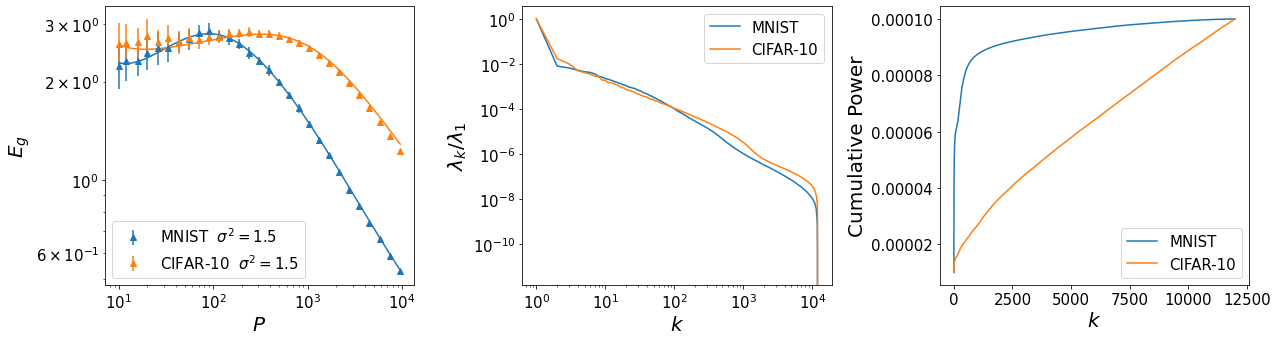

In [ ]:
plt.rcParams.update({'font.size': 15})
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

fig.set_size_inches(18,5)

i = ker_idx = 1
j = reg_idx = 0
k = noise_idx = 2
print('ker_var: ', ker_var_mnist[ker_idx], ' lamb: ', lamb_mnist[reg_idx], ' noise: ', noise_std_mnist[noise_idx])
theory_mnist = all_errs_mnist[i,j,k]#/all_errs[i,j,k,0]
exp_mnist = errs_ker_mnist[i,j,k][:-1]#/errs_ker[i,j,k][0]
std_mnist= stds_ker_mnist[i,j,k][:-1]/np.sqrt(num_repeats_mnist)#/errs_ker[i,j,k][0]

theory_mnist_0 = all_errs_mnist[i,j,0]#/all_errs[i,j,k,0]
exp_mnist_0 = errs_ker_mnist[i,j,0][:-1]#/errs_ker[i,j,k][0]
std_mnist_0= stds_ker_mnist[i,j,0][:-1]/np.sqrt(num_repeats_mnist)#/errs_ker[i,j,k][0]

print('ker_var: ', ker_var_cifar[ker_idx], ' lamb: ', lamb_cifar[reg_idx], ' noise: ', noise_std_cifar[noise_idx])
theory_cifar = all_errs_cifar[i,j,k]#/all_errs[i,j,k,0]
exp_cifar = errs_ker_cifar[i,j,k][:-1]#/errs_ker[i,j,k][0]
std_cifar = stds_ker_cifar[i,j,k][:-1]/np.sqrt(num_repeats_cifar)#/errs_ker[i,j,k][0]

theory_cifar_0 = all_errs_cifar[i,j,0]#/all_errs[i,j,k,0]
exp_cifar_0 = errs_ker_cifar[i,j,0][:-1]#/errs_ker[i,j,k][0]
std_cifar_0 = stds_ker_cifar[i,j,0][:-1]/np.sqrt(num_repeats_cifar)#/errs_ker[i,j,k][0]

ax1.plot(ptheory_mnist, theory_mnist, color = 'C%d' % (0))
ax1.plot(ptheory_cifar, theory_cifar, color = 'C%d' % (1))
ax1.errorbar(pvals_mnist[:-1], exp_mnist, std_mnist, fmt='^', color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = 1.5$')
ax1.errorbar(pvals_cifar[:-1], exp_cifar, std_cifar, fmt='^', color = 'C%d' % (1), label = 'CIFAR-10  $\sigma^2 = 1.5$')

# ax1.plot(ptheory_mnist, theory_mnist_0, '--', color = 'C%d' % (0))
# ax1.plot(ptheory_cifar, theory_cifar_0, '--', color = 'C%d' % (1))
# ax1.errorbar(pvals_mnist[:-1], exp_mnist_0, std_mnist_0, fmt='o', color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = 0$')
# ax1.errorbar(pvals_cifar[:-1], exp_cifar_0, std_cifar_0, fmt='o', color = 'C%d' % (1), label = 'CIFAR-10  $\sigma^2 = 0$')

ax1.set_xlabel(r'$P$', fontsize=20)
ax1.set_ylabel(r'$E_g$', fontsize=20)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

k = np.linspace(1,len(spectrum_cifar[ker_idx]),len(spectrum_cifar[ker_idx]))
ax2.loglog(k,spectrum_mnist[ker_idx]/spectrum_mnist[ker_idx][0], label = 'MNIST')
ax2.loglog(k,spectrum_cifar[ker_idx]/spectrum_cifar[ker_idx][0], label = 'CIFAR-10')
ax2.set_ylabel(r'$\lambda_k/\lambda_1$', fontsize=20)
ax2.set_xlabel(r'$k$', fontsize=20)
ax2.legend()

ax3.plot(np.cumsum(weights_mnist[ker_idx])/1e+4, label = 'MNIST')
ax3.plot(np.cumsum(weights_cifar[ker_idx])/1e+4, label = 'CIFAR-10')
ax3.set_xlabel(r'$k$', fontsize=20)
ax3.set_ylabel(r'Cumulative Power', fontsize=20)
#ax3.set_xscale('log')
ax3.legend()

plt.tight_layout()
plt.show()

ker_var:  0.1  lamb:  0.01  noise:  1.5000001
ker_var:  0.1  lamb:  0.01  noise:  1.5000001


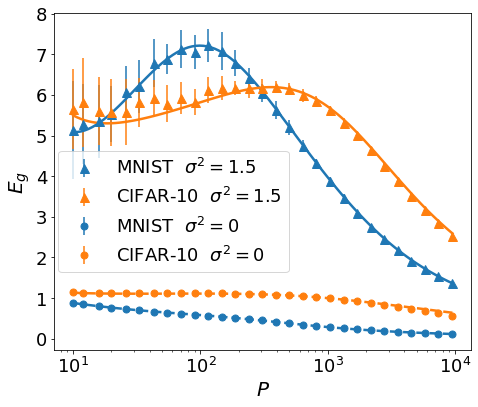

In [ ]:
i = ker_idx = 1
j = reg_idx = 0
k = noise_idx = 4
print('ker_var: ', ker_var_mnist[ker_idx], ' lamb: ', lamb_mnist[reg_idx], ' noise: ', noise_std_mnist[noise_idx])
theory_mnist = all_errs_mnist[i,j,k]
exp_mnist = errs_ker_mnist[i,j,k][:-1]
std_mnist= stds_ker_mnist[i,j,k][:-1]/np.sqrt(num_repeats_mnist)

theory_mnist_0 = all_errs_mnist[i,j,0]
exp_mnist_0 = errs_ker_mnist[i,j,0][:-1]
std_mnist_0= stds_ker_mnist[i,j,0][:-1]/np.sqrt(num_repeats_mnist)

print('ker_var: ', ker_var_cifar[ker_idx], ' lamb: ', lamb_cifar[reg_idx], ' noise: ', noise_std_cifar[noise_idx])
theory_cifar = all_errs_cifar[i,j,k]
exp_cifar = errs_ker_cifar[i,j,k][:-1]
std_cifar = stds_ker_cifar[i,j,k][:-1]/np.sqrt(num_repeats_cifar)

theory_cifar_0 = all_errs_cifar[i,j,0]
exp_cifar_0 = errs_ker_cifar[i,j,0][:-1]
std_cifar_0 = stds_ker_cifar[i,j,0][:-1]/np.sqrt(num_repeats_cifar)

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

plt.plot(ptheory_mnist, theory_mnist, color = 'C%d' % (0),  linewidth=2.5)
plt.plot(ptheory_cifar, theory_cifar, color = 'C%d' % (1),  linewidth=2.5)
plt.errorbar(pvals_mnist[:-1], exp_mnist, std_mnist, fmt='^',
             color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = 1.5$', markersize = 9)
plt.errorbar(pvals_cifar[:-1], exp_cifar, std_cifar, fmt='^',
             color = 'C%d' % (1), label = 'CIFAR-10  $\sigma^2 = 1.5$', markersize = 9)

plt.plot(ptheory_mnist, theory_mnist_0, '--', color = 'C%d' % (0), linewidth=2.5)
plt.plot(ptheory_cifar, theory_cifar_0, '--', color = 'C%d' % (1), linewidth=2.5)
plt.errorbar(pvals_mnist[:-1], exp_mnist_0, std_mnist_0, fmt='o',
             color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = 0$', markersize = 7)
plt.errorbar(pvals_cifar[:-1], exp_cifar_0, std_cifar_0, fmt='o',
             color = 'C%d' % (1), label = 'CIFAR-10  $\sigma^2 = 0$', markersize = 7)

plt.xlabel(r'$P$', fontsize=20)
plt.ylabel(r'$E_g$', fontsize=20)
plt.xscale('log')
#ax1.set_yscale('log')
plt.legend(loc=(0.01,0.23))

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10vsMNIST_RBF_DoubleDescent_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

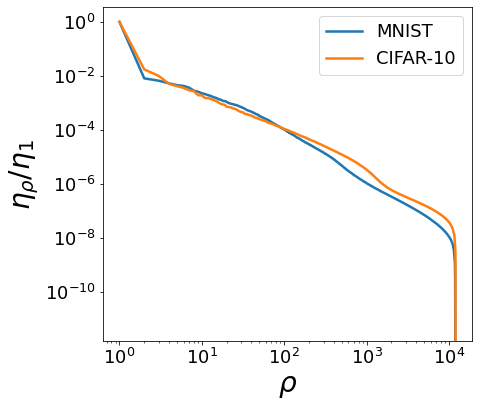

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

k = np.linspace(1,len(spectrum_cifar[ker_idx]),len(spectrum_cifar[ker_idx]))
plt.loglog(k,spectrum_mnist[ker_idx]/spectrum_mnist[ker_idx][0], label = 'MNIST', linewidth=2.5)
plt.loglog(k,spectrum_cifar[ker_idx]/spectrum_cifar[ker_idx][0], label = 'CIFAR-10', linewidth=2.5)
plt.ylabel(r'$\eta_\rho/\eta_1$', fontsize=28)
plt.xlabel(r'$\rho$', fontsize=28)
plt.legend()

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10vsMNIST_RBF_Spectrum_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

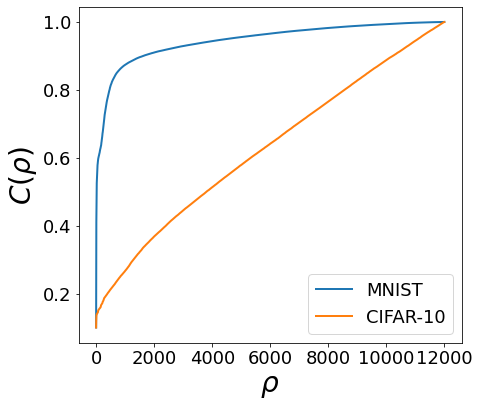

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

plt.plot(np.cumsum(weights_mnist[ker_idx]), label = 'MNIST', linewidth=2)
plt.plot(np.cumsum(weights_cifar[ker_idx]), label = 'CIFAR-10', linewidth=2)
plt.xlabel(r'$\rho$', fontsize=28)
plt.ylabel(r'$C(\rho)$', fontsize=28)
#ax3.set_xscale('log')
plt.legend()

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10vsMNIST_RBF_Weigths_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

# With training error

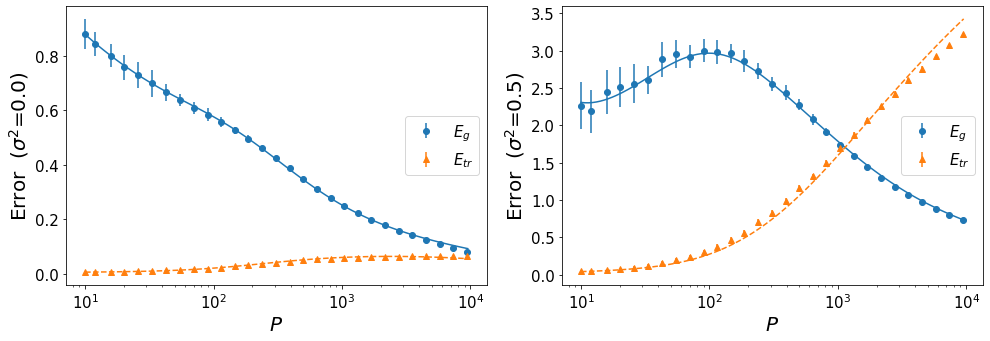

In [ ]:
## Plotting the curves

plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(1,2)
fig.set_size_inches(14,5)

## Specify the regularization index for plotting
j = reg_idx = 0
ker_var = ker_var_mnist[1:2]
noise_idx = [0,2]
for i, var in enumerate(ker_var):
  for k, idx in enumerate(noise_idx):
    theory = all_errs_mnist[i,j,idx]
    train_theory = train_errs_mnist[i,j,idx]
    exp = errs_ker_mnist[i,j,idx][:-1]
    std = stds_ker_mnist[i,j,idx][:-1]
    ptheory = ptheory_mnist
    pvals = pvals_mnist

    exp_tr = errs_tr_ker_mnist[i,j,idx][:-1]
    std_tr = stds_tr_ker_mnist[i,j,idx][:-1]

    axs[k].plot(ptheory, theory, color = 'C%d' % (0))
    axs[k].errorbar(pvals[:-1], exp, std, fmt='o', color = 'C%d' % (0), label = '$E_g$')
    axs[k].set_xlabel(r'$p$', fontsize=20)
    axs[k].set_xscale('log')
    #axs[i].set_yscale('log')

    axs[k].plot(ptheory, train_theory, '--',color = 'C%d' % (1))
    axs[k].errorbar(pvals[:-1], exp_tr, std_tr, fmt='^', color = 'C%d' % (1), label='$E_{tr}$')
    axs[k].set_xlabel(r'$P$', fontsize=20)
    axs[k].set_ylabel(r'Error  ($\sigma^2$=%0.1f)' %noise_std_mnist[idx], fontsize=20)
    axs[k].set_xscale('log')
    axs[k].legend(loc='center right')
plt.tight_layout()
if save_data:
  filename = save_dir + 'MNIST_with_training_error.pdf'
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

# Bias - Variance

In [ ]:
error_theory_mnist_BV = np.load(dir_mnist_theory_BV, allow_pickle = True)
error_exp_ker_mnist_BV = np.load(dir_mnist_exp_BV)

[ptheory_mnist_BV, spectrum_mnist_BV, 
 weights_mnist_BV, errs_theory_mnist_BV, 
 errs_tr_theory_mnist_BV, bias_theory_mnist, var_theory_mnist, params_mnist_BV] = [error_theory_mnist_BV['arr_'+str(i)] for i in range(len(error_theory_mnist_BV.files))]
 
[pvals_mnist_BV, errs_ker_mnist_BV, stds_ker_mnist_BV, 
 errs_tr_ker_mnist_BV, stds_tr_ker_mnist_BV,
 bias_ker_mnist, bias_ker_mnist_stds, var_ker_mnist, var_ker_mnist_stds] = [error_exp_ker_mnist_BV['arr_'+str(i)] for i in range(len(error_exp_ker_mnist_BV.files))]

params_mnist_BV = params_mnist_BV.tolist()
print(params_mnist_BV)

ker_var_mnist_BV = params_mnist_BV['ker_var']
lamb_mnist_BV = params_mnist_BV['lamb']
noise_std_mnist_BV = params_mnist_BV['noise_std']**2
num_repeats_mnist_BV = params_mnist_BV['num_repeats']


error_theory_cifar_BV = np.load(dir_cifar_theory_BV, allow_pickle = True)
error_exp_ker_cifar_BV = np.load(dir_cifar_exp_BV)

[ptheory_cifar_BV, spectrum_cifar_BV, 
 weights_cifar_BV, errs_theory_cifar_BV, 
 errs_tr_theory_cifar_BV, bias_theory_cifar, var_theory_cifar, params_cifar_BV] = [error_theory_cifar_BV['arr_'+str(i)] for i in range(len(error_theory_cifar_BV.files))]
 
[pvals_cifar_BV, errs_ker_cifar_BV, stds_ker_cifar_BV, 
 errs_tr_ker_cifar_BV, stds_tr_ker_cifar_BV,
 bias_ker_cifar, bias_ker_cifar_stds, var_ker_cifar, var_ker_cifar_stds] = [error_exp_ker_cifar_BV['arr_'+str(i)] for i in range(len(error_exp_ker_cifar_BV.files))]

params_cifar_BV = params_cifar_BV.tolist()
print(params_cifar_BV)

ker_var_cifar_BV = params_cifar_BV['ker_var']
lamb_cifar_BV = params_cifar_BV['lamb']
noise_std_cifar_BV = params_cifar_BV['noise_std']**2
num_repeats_cifar_BV = params_cifar_BV['num_repeats']

{'dataset_name': 'MNIST', 'test_size': 10000, 'subset_size': 12000, 'batch_size': 100, 'num_repeats': 10, 'noise_std': array([0.        , 0.70710677], dtype=float32), 'ker_var': [0.1], 'lamb': [0.01]}
{'dataset_name': 'CIFAR10', 'test_size': 10000, 'subset_size': 12000, 'batch_size': 100, 'num_repeats': 10, 'noise_std': array([0.        , 0.70710677], dtype=float32), 'ker_var': [0.1], 'lamb': [0.01]}


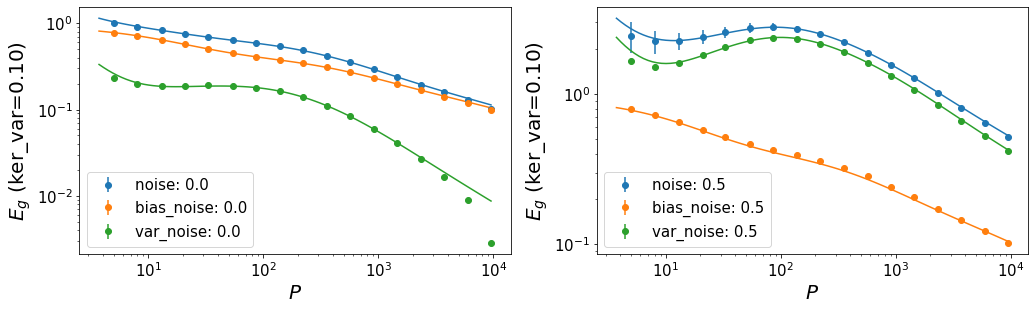

In [ ]:
## Plotting the curves

plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots(len(ker_var_cifar_BV)+1, 2)
fig.set_size_inches(17,5*(len(ker_var_cifar_BV)+1))

## Specify the regularization index for plotting
j = reg_idx = 0

pval_cut_th = 12
pval_cut_exp = 3

k = 0
noise = noise_std_mnist_BV[k]

for i, var in enumerate(ker_var_mnist_BV):
  for k, noise in enumerate(noise_std_mnist_BV):
    ptheory = ptheory_mnist_BV[pval_cut_th:]
    pvals = pvals_mnist_BV[pval_cut_exp:]

    theory = errs_theory_mnist_BV[i,j,k][pval_cut_th:]
    train_theory = errs_tr_theory_mnist_BV[i,j,k][pval_cut_th:]
    bias = bias_theory_mnist[i,j,k][pval_cut_th:]
    variance = var_theory_mnist[i,j,k][pval_cut_th:]

    exp = errs_ker_mnist_BV[i,j,k][pval_cut_exp:]
    std = stds_ker_mnist_BV[i,j,k][pval_cut_exp:]
    exp_tr = errs_tr_ker_mnist_BV[i,j,k][pval_cut_exp:]
    std_tr = stds_tr_ker_mnist_BV[i,j,k][pval_cut_exp:]
    exp_bias = bias_ker_mnist[i,j,k][pval_cut_exp:]
    exp_bias_std = bias_ker_mnist_stds[i,j,k][pval_cut_exp:]
    exp_var = var_ker_mnist[i,j,k][pval_cut_exp:]
    exp_var_std = var_ker_mnist_stds[i,j,k][pval_cut_exp:]

    axs[i,k].plot(ptheory, theory, color = 'C%d' % (0))
    axs[i,k].errorbar(pvals, exp, std, fmt='o', color = 'C%d' % (0), label = 'noise: %0.1f' %(noise_std_mnist_BV[k]))
    axs[i,k].set_xlabel(r'$P$', fontsize=20)
    axs[i,k].set_ylabel(r'$E_g$ (ker_var=%0.2f)' %var, fontsize=20)


    axs[i,k].plot(ptheory, bias, color = 'C%d' % (1))
    axs[i,k].plot(ptheory, variance, color = 'C%d' % (2))
    axs[i,k].errorbar(pvals, exp_bias, exp_bias_std, fmt='o', color = 'C%d' % (1), label = 'bias_noise: %0.1f' %(noise_std_mnist_BV[k]))
    axs[i,k].errorbar(pvals, exp_var, exp_var_std, fmt='o', color = 'C%d' % (2), label = 'var_noise: %0.1f' %(noise_std_mnist_BV[k]))

    axs[i,k].set_xscale('log')
    axs[i,k].set_yscale('log')

axs[i,0].legend()
axs[i,1].legend()
axs[-1,0].set_visible(False)
axs[-1,1].set_visible(False)
plt.show()

ker_var:  0.1  lamb:  0.01  noise:  0.0
ker_var:  0.1  lamb:  0.01  noise:  0.0


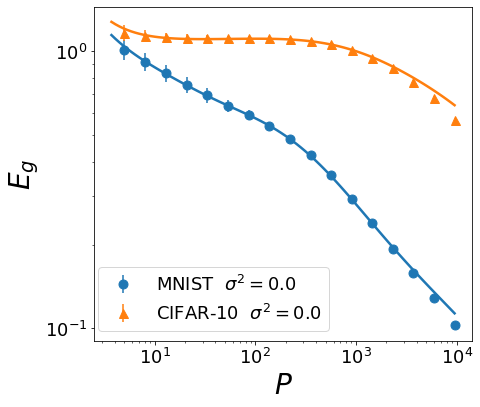

In [ ]:
i = ker_idx = 0
j = reg_idx = 0
k = noise_idx = 0
print('ker_var: ', ker_var_mnist_BV[ker_idx], ' lamb: ', lamb_mnist_BV[reg_idx], ' noise: ', noise_std_mnist_BV[noise_idx])
ptheory_mnist = ptheory_mnist_BV[pval_cut_th:]
pvals_mnist = pvals_mnist_BV[pval_cut_exp:]
ptheory_cifar = ptheory_cifar_BV[pval_cut_th:]
pvals_cifar = pvals_cifar_BV[pval_cut_exp:]

theory_mnist = errs_theory_mnist_BV[i,j,k][pval_cut_th:]
exp_mnist = errs_ker_mnist_BV[i,j,k][pval_cut_exp:]
std_mnist= stds_ker_mnist_BV[i,j,k][pval_cut_exp:]


print('ker_var: ', ker_var_cifar_BV[ker_idx], ' lamb: ', lamb_cifar_BV[reg_idx], ' noise: ', noise_std_cifar_BV[noise_idx])
theory_cifar = all_errs_cifar[i,j,k]
exp_cifar = errs_ker_cifar[i,j,k][:-1]
std_cifar = stds_ker_cifar[i,j,k][:-1]

theory_cifar = errs_theory_cifar_BV[i,j,k][pval_cut_th:]
exp_cifar = errs_ker_cifar_BV[i,j,k][pval_cut_exp:]
std_cifar= stds_ker_cifar_BV[i,j,k][pval_cut_exp:]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

plt.plot(ptheory_mnist, theory_mnist, color = 'C%d' % (0),  linewidth=2.5)
plt.plot(ptheory_cifar, theory_cifar, color = 'C%d' % (1),  linewidth=2.5)
plt.errorbar(pvals_mnist, exp_mnist, std_mnist, fmt='o',
             color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = %0.1f$'%noise_std_mnist_BV[noise_idx], markersize = 9)
plt.errorbar(pvals_cifar, exp_cifar, std_cifar, fmt='^',
             color = 'C%d' % (1), label = 'CIFAR-10  $\sigma^2 = %0.1f$'%noise_std_mnist_BV[noise_idx], markersize = 9)

plt.xlabel(r'$P$', fontsize=28)
plt.ylabel(r'$E_g$', fontsize=28)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=(0.01,0.03))

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10vsMNIST_RBF_Noiseless_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

ker_var:  0.1  lamb:  0.01  noise:  0.49999997
ker_var:  0.1  lamb:  0.01  noise:  0.49999997


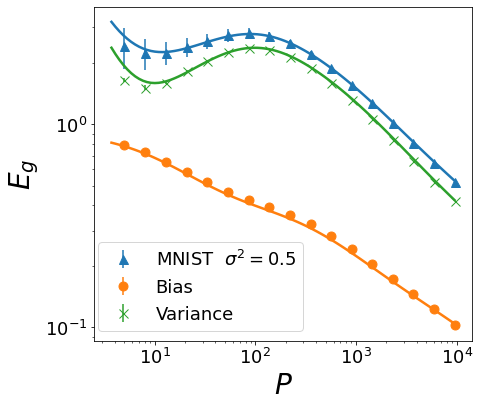

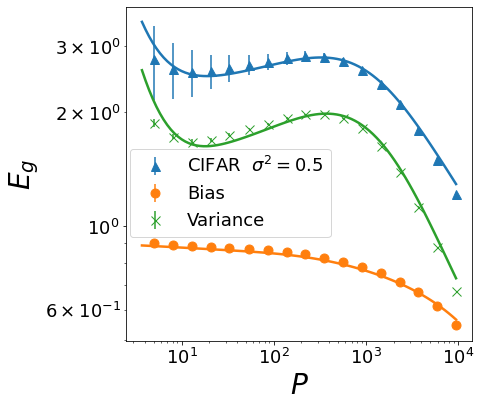

In [ ]:
i = ker_idx = 0
j = reg_idx = 0
k = noise_idx = 1
print('ker_var: ', ker_var_mnist_BV[ker_idx], ' lamb: ', lamb_mnist_BV[reg_idx], ' noise: ', noise_std_mnist_BV[noise_idx])
ptheory_mnist = ptheory_mnist_BV[pval_cut_th:]
pvals_mnist = pvals_mnist_BV[pval_cut_exp:]

theory_mnist = errs_theory_mnist_BV[i,j,k][pval_cut_th:]
bias_mnist = bias_theory_mnist[i,j,k][pval_cut_th:]
variance_mnist = var_theory_mnist[i,j,k][pval_cut_th:]

exp_mnist = errs_ker_mnist_BV[i,j,k][pval_cut_exp:]
std_mnist= stds_ker_mnist_BV[i,j,k][pval_cut_exp:]
exp_mnist_bias = bias_ker_mnist[i,j,k][pval_cut_exp:]
exp_mnist_bias_std = bias_ker_mnist_stds[i,j,k][pval_cut_exp:]
exp_mnist_var = var_ker_mnist[i,j,k][pval_cut_exp:]
exp_mnist_var_std = var_ker_mnist_stds[i,j,k][pval_cut_exp:]


print('ker_var: ', ker_var_cifar_BV[ker_idx], ' lamb: ', lamb_cifar_BV[reg_idx], ' noise: ', noise_std_cifar_BV[noise_idx])
ptheory_cifar = ptheory_cifar_BV[pval_cut_th:]
pvals_cifar = pvals_cifar_BV[pval_cut_exp:]

theory_cifar = errs_theory_cifar_BV[i,j,k][pval_cut_th:]
bias_cifar = bias_theory_cifar[i,j,k][pval_cut_th:]
variance_cifar = var_theory_cifar[i,j,k][pval_cut_th:]

exp_cifar = errs_ker_cifar_BV[i,j,k][pval_cut_exp:]
std_cifar= stds_ker_cifar_BV[i,j,k][pval_cut_exp:]
exp_cifar_bias = bias_ker_cifar[i,j,k][pval_cut_exp:]
exp_cifar_bias_std = bias_ker_cifar_stds[i,j,k][pval_cut_exp:]
exp_cifar_var = var_ker_cifar[i,j,k][pval_cut_exp:]
exp_cifar_var_std = var_ker_cifar_stds[i,j,k][pval_cut_exp:]

## Plot MNIST
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))

plt.plot(ptheory_mnist, theory_mnist, color = 'C%d' % (0),  linewidth=2.5)
plt.plot(ptheory_mnist, bias_mnist, color = 'C%d' % (1),  linewidth=2.5)
plt.plot(ptheory_mnist, variance_mnist, color = 'C%d' % (2),  linewidth=2.5)

plt.errorbar(pvals_mnist, exp_mnist, std_mnist, fmt='^',
             color = 'C%d' % (0), label = 'MNIST  $\sigma^2 = %0.1f$'%noise_std_mnist_BV[noise_idx], markersize = 9)
plt.errorbar(pvals_mnist, exp_mnist_bias, exp_mnist_bias_std, fmt='o',
             color = 'C%d' % (1), label = 'Bias', markersize = 9)
plt.errorbar(pvals_mnist, exp_mnist_var, exp_mnist_var_std, fmt='x',
             color = 'C%d' % (2), label = 'Variance', markersize = 9)


plt.xlabel(r'$P$', fontsize=28)
plt.ylabel(r'$E_g$', fontsize=28)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=(0.01,0.03))

plt.tight_layout()
if save_data:
  filename = save_dir + 'MNIST_RBF_DoubleDescent_BV_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

## Plot CIFAR
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(7,6))


plt.plot(ptheory_cifar, theory_cifar, color = 'C%d' % (0),  linewidth=2.5)
plt.plot(ptheory_cifar, bias_cifar, color = 'C%d' % (1),  linewidth=2.5)
plt.plot(ptheory_cifar, variance_cifar, color = 'C%d' % (2),  linewidth=2.5)

plt.errorbar(pvals_cifar, exp_cifar, std_cifar, fmt='^',
             color = 'C%d' % (0), label = 'CIFAR  $\sigma^2 = %0.1f$'%noise_std_cifar_BV[noise_idx], markersize = 9)
plt.errorbar(pvals_cifar, exp_cifar_bias, exp_cifar_bias_std, fmt='o',
             color = 'C%d' % (1), label = 'Bias', markersize = 9)
plt.errorbar(pvals_cifar, exp_cifar_var, exp_cifar_var_std, fmt='x',
             color = 'C%d' % (2), label = 'Variance', markersize = 9)

plt.xlabel(r'$P$', fontsize=28)
plt.ylabel(r'$E_g$', fontsize=28)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=(0.01,0.31))

plt.tight_layout()
if save_data:
  filename = save_dir + 'CIFAR10_RBF_DoubleDescent_BV_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()

# Spectrum

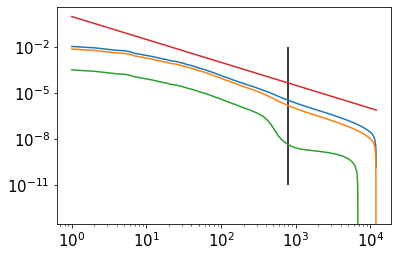

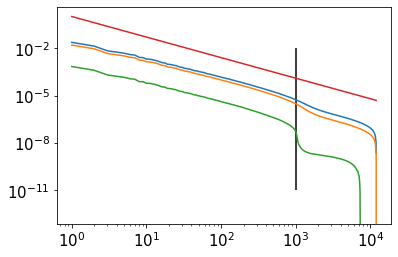

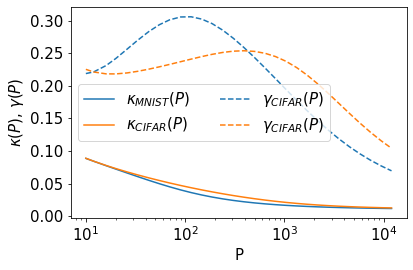

In [ ]:
k = np.linspace(1,len(spectrum_mnist.T),len(spectrum_mnist.T)-1)
plt.semilogy(k[:],spectrum_mnist.T[1:])
plt.semilogx(k, k**(-1.5))
plt.vlines(784,1e-11,1e-2)
plt.show()

ker_idx = 1
reg_idx = 0

kappa_mnist = ker_sim.solve_kappa(pvals_mnist, lamb_mnist[reg_idx], spectrum_mnist[ker_idx])
gamma_mnist= np.array([ker_sim.gamma_fn(pvals_mnist[i], kappa_mnist[i], spectrum_mnist[ker_idx]).sum() for i in range(len(pvals_mnist))])

k = np.linspace(1,len(spectrum_cifar.T),len(spectrum_cifar.T)-1)
plt.semilogy(k,spectrum_cifar.T[1:])
plt.vlines(1024,1e-11,1e-2)
plt.semilogx(k, k**(-1.3))
plt.show()
kappa_cifar = ker_sim.solve_kappa(pvals_cifar, lamb_cifar[reg_idx], spectrum_cifar[ker_idx])
gamma_cifar= np.array([ker_sim.gamma_fn(pvals_cifar[i], kappa_cifar[i], spectrum_cifar[ker_idx]).sum() for i in range(len(pvals_cifar))])

plt.semilogx(pvals_mnist,kappa_mnist, color ='C0', label = '$\kappa_{MNIST}(P)$')
plt.semilogx(pvals_mnist,kappa_cifar, color ='C1', label = '$\kappa_{CIFAR}(P)$')
plt.semilogx(pvals_cifar,gamma_mnist, '--', color ='C0', label = '$\gamma_{CIFAR}(P)$')
plt.semilogx(pvals_cifar,gamma_cifar, '--', color ='C1', label = '$\gamma_{CIFAR}(P)$')
plt.legend(loc='center left',ncol=2)
plt.ylabel('$\kappa(P)$, $\gamma(P)$')
plt.xlabel('P')
plt.tight_layout()
if save_data:
  filename = save_dir + 'kappa_gamma_var-%0.1f_lamb-%0.2f.pdf' %(ker_var_cifar[i], lamb_cifar[j])
  plt.savefig(filename, bbox_inches = 'tight')
plt.show()